## Классификация FashionMNIST

In [ ]:
import json
import os
import re

import numpy as np
import torch
import torchvision
from IPython.display import clear_output
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F
from torchvision.datasets import FashionMNIST

In [ ]:
def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())

    predicted_labels = torch.cat(predicted_labels)
    predicted_labels = ",".join([str(x.item()) for x in list(predicted_labels)])
    return predicted_labels


def get_accuracy(model, data_loader):
    predicted_labels = []
    real_labels = []
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            y_predicted = model(batch[0].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())
            real_labels.append(batch[1])

    predicted_labels = torch.cat(predicted_labels)
    real_labels = torch.cat(real_labels)
    accuracy_score = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
    return accuracy_score

In [ ]:
!wget https://github.com/girafe-ai/ml-course/raw/24f_ysda/homeworks/hw_overfitting/hw_overfitting_data_dict -O hw_overfitting_data_dict.npy

--2025-04-10 13:57:43--  https://github.com/girafe-ai/ml-course/raw/24f_ysda/homeworks/hw_overfitting/hw_overfitting_data_dict
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/girafe-ai/ml-course/24f_ysda/homeworks/hw_overfitting/hw_overfitting_data_dict [following]
--2025-04-10 13:57:43--  https://raw.githubusercontent.com/girafe-ai/ml-course/24f_ysda/homeworks/hw_overfitting/hw_overfitting_data_dict
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272446 (6.0M) [application/octet-stream]
Saving to: ‘hw_overfitting_data_dict.npy’

hw_overfitting_data 100%[===================>]   5.98M  --.-K

In [ ]:
CUDA_DEVICE_ID = 0

In [ ]:
device = (
    torch.device(f"cuda:{CUDA_DEVICE_ID}") if torch.cuda.is_available() else torch.device("cpu")
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 166kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.13MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


Text(0.5, 1.0, 'Image label: 2')

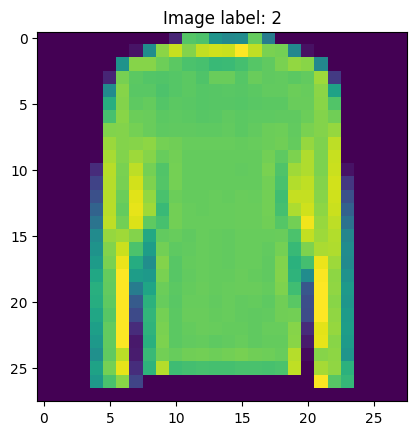

In [ ]:
train_fmnist_data = FashionMNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_fmnist_data = FashionMNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")

In [ ]:
random_batch[0].size()

torch.Size([32, 1, 28, 28])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FasionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )

        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flat = nn.Flatten()
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(512, 10)

    def forward(self, x):
        if x.dim() == 3:
            x = x.unsqueeze(0)
        if x.size(1) != 1:
            x = x.unsqueeze(1)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.global_pool(x)
        x = self.flat(x)
        x = self.dropout(x)
        x = self.linear(x)
        return x

model_task_1 = FasionMNIST()


In [ ]:
model_task_1.to(device)

FasionMNIST(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
optimizer = torch.optim.Adam(model_task_1.parameters(), lr = 0.0001, weight_decay=1e-4)
lss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)

In [ ]:
epoch = 10

for i in range(epoch):
  for batch, (X, y) in enumerate(iter(train_data_loader)):
    X, y = X.to(device), y.to(device)
    y_pred = model_task_1(X)
    loss = lss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      print('Epoch: %d | Batch: %d | Loss: %f' % (i+1, batch, loss.data))

Epoch: 1 | Batch: 0 | Loss: 0.129589
Epoch: 1 | Batch: 100 | Loss: 0.233676
Epoch: 1 | Batch: 200 | Loss: 0.317588
Epoch: 1 | Batch: 300 | Loss: 0.103050
Epoch: 1 | Batch: 400 | Loss: 0.214721
Epoch: 1 | Batch: 500 | Loss: 0.100689
Epoch: 1 | Batch: 600 | Loss: 0.260023
Epoch: 1 | Batch: 700 | Loss: 0.082325
Epoch: 1 | Batch: 800 | Loss: 0.311928
Epoch: 1 | Batch: 900 | Loss: 0.471790
Epoch: 1 | Batch: 1000 | Loss: 0.251287
Epoch: 1 | Batch: 1100 | Loss: 0.072880
Epoch: 1 | Batch: 1200 | Loss: 0.321515
Epoch: 1 | Batch: 1300 | Loss: 0.164248
Epoch: 1 | Batch: 1400 | Loss: 0.445201
Epoch: 1 | Batch: 1500 | Loss: 0.102671
Epoch: 1 | Batch: 1600 | Loss: 0.205697
Epoch: 1 | Batch: 1700 | Loss: 0.167687
Epoch: 1 | Batch: 1800 | Loss: 0.165683
Epoch: 2 | Batch: 0 | Loss: 0.139170
Epoch: 2 | Batch: 100 | Loss: 0.287804
Epoch: 2 | Batch: 200 | Loss: 0.406774
Epoch: 2 | Batch: 300 | Loss: 0.090776
Epoch: 2 | Batch: 400 | Loss: 0.328537
Epoch: 2 | Batch: 500 | Loss: 0.440019
Epoch: 2 | Batch: 60

Оценим качество классификации:

In [ ]:
train_acc_task_1 = get_accuracy(model_task_1, train_data_loader)
print(f"Neural network accuracy on train set: {train_acc_task_1:3.5}")

Neural network accuracy on train set: 0.95013


In [ ]:
test_acc_task_1 = get_accuracy(model_task_1, test_data_loader)
print(f"Neural network accuracy on test set: {test_acc_task_1:3.5}")

Neural network accuracy on test set: 0.9064
